In [64]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',-1)

In [65]:
df = pd.read_excel('opiniones_actuaria.xlsx')

In [66]:
var = ['¿Qué opinas de la seriación de Actuaría?, ¿Por qué?','¿Qué tan de acuerdo estás con la seriación?']

In [67]:
df = df[var]

In [68]:
df.shape

(408, 2)

In [69]:
df.rename(columns=dict(zip(var,['texto','sentimiento'])),inplace=True)

In [70]:
df.head()

texto  \
0  Me gusta que no puedas pasar a una materia sin antes saber lo necesario.                                                                                                                                                                        
1  Opino que el concepto de la seriación es bueno, pues así vas construyendo las bases y va creciendo el nivel cómo se supone debería de ser, aunque pienso que la seriación y el acomodo de las materias en los semestres no está del todo bien   
2  Es adecuada, ya que permite que las personas que van avanzando en la seriación, sean aquellas que cuentas ya con conocimientos previos bien establecidos.                                                                                       
3  Adecuada pero sobrevalorada                                                                                                                                                                                                                     
4  Mal asignada.                                                                                                                                                                                                                                   

   sentimiento  
0  4            
1  4            
2  4            
3  2            
4  3

In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords as sw

In [96]:
stop=sw.words('spanish')

In [98]:
cv = CountVectorizer(ngram_range=(1,3),encoding='utf8',
                     strip_accents='unicode',stop_words=stop)

In [99]:
cv.fit(df['texto'])

/home/jose/Documentos/unam/repos/cdd_2020_1/lib64/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'ten

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 3), preprocessor=None,
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...],
                strip_accents='unicode', token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [100]:
X= pd.DataFrame(cv.transform(df['texto']).toarray(),columns=cv.get_feature_names())

In [101]:
X.head()

100  1ro  1ro 8vo  1ro 8vo ademas  3l  3l conocimiento  \
0  0    0    0        0               0   0                 
1  0    0    0        0               0   0                 
2  0    0    0        0               0   0                 
3  0    0    0        0               0   0                 
4  0    0    0        0               0   0                 

   3l conocimiento pasado  8vo  8vo ademas  8vo ademas materias  ...  \
0  0                       0    0           0                    ...   
1  0                       0    0           0                    ...   
2  0                       0    0           0                    ...   
3  0                       0    0           0                    ...   
4  0                       0    0           0                    ...   

   volverse irregular aumenta  voy  voy acabar  voy acabar carrera  vuelve  \
0  0                           0    0           0                   0        
1  0                           0    0           0                   0        
2  0                           0    0           0                   0        
3  0                           0    0           0                   0        
4  0                           0    0           0                   0        

   vuelve aun  vuelve aun mas  vuelve complicado  vuelve complicado si  xd  
0  0           0               0                  0                     0   
1  0           0               0                  0                     0   
2  0           0               0                  0                     0   
3  0           0               0                  0                     0   
4  0           0               0                  0                     0   

[5 rows x 5329 columns]

In [113]:
df['v_prom_palabras'] = df['texto'].map(lambda x:np.mean([len(y) for y in x.split(' ')]))
df['v_n_palabras'] = df['texto'].map(lambda x:len([len(y) for y in x.split(' ')]))
df['v_n_caracteres'] = df['texto'].map(len)

In [117]:
varc = [v for v in df if v[:2]=='v_']

In [119]:
X = X.merge(df[varc],left_index=True,right_index=True,how='inner')

In [120]:
from sklearn.feature_selection import SelectKBest

In [121]:
df['sentimiento'].value_counts(True)

4    0.323529
3    0.321078
5    0.174020
2    0.102941
1    0.078431
Name: sentimiento, dtype: float64

In [127]:
y = (df['sentimiento'].astype(int)>=4).astype(int)

In [136]:
sk = SelectKBest(k=20)
sk.fit(X,y)

SelectKBest(k=20, score_func=<function f_classif at 0x7f6e7c2b1488>)

In [137]:
best = [a for a,b in zip(X.columns,sk.get_support()) if b]

In [139]:
X = X[best]

In [202]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

In [215]:
modelo = MLPClassifier(hidden_layer_sizes=(40,20,40,20,40,),max_iter=4000,
                       activation='relu')

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

In [217]:
Xt, Xv, yt, yv =train_test_split(X,y,train_size=0.7)

In [218]:
modelo.fit(Xt,yt)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 20, 40, 20, 40), learning_rate='constant',
              learning_rate_init=0.001, max_iter=4000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [219]:
print(accuracy_score(y_true=yt,y_pred=modelo.predict(Xt)))
print(accuracy_score(y_true=yv,y_pred=modelo.predict(Xv)))

0.6736842105263158
0.6585365853658537


In [221]:
print(roc_auc_score(y_true=yt,y_score=modelo.predict_proba(Xt)[:,1]))
print(roc_auc_score(y_true=yv,y_score=modelo.predict_proba(Xv)[:,1]))

0.8082222222222223
0.8105121293800538


In [224]:
X.head()

afecta  atrasa  atrasas  avanzando  buena  conocimientos previos  cursar  \
0  0       0       0        0          0      0                      0        
1  0       0       0        0          0      0                      0        
2  0       0       0        1          0      1                      0        
3  0       0       0        0          0      0                      0        
4  0       0       0        0          0      0                      0        

   demasiado  excelente  importante  mal  mala  nivel  poder avanzar  previos  \
0  0          0          0           0    0     0      0              0         
1  0          0          0           0    0     1      0              0         
2  0          0          0           0    0     0      0              1         
3  0          0          0           0    0     0      0              0         
4  0          0          0           1    0     0      0              0         

   previos materias  si  tambien  tener conocimientos previos  v_prom_palabras  
0  0                 0   0        0                            3.933333         
1  0                 0   0        0                            4.288889         
2  0                 0   0        0                            5.416667         
3  0                 0   0        0                            6.250000         
4  0                 0   0        0                            6.000000

In [228]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

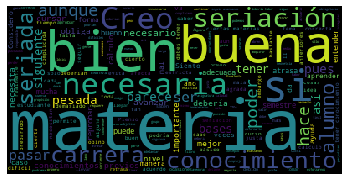

In [229]:
wordcloud = WordCloud(stopwords=stop).generate_from_text(df['texto'].to_string(index=False))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [230]:
tfv= TfidfVectorizer(max_features=8000,
                     stop_words=stop,
                     use_idf=True,
                     ngram_range=(1,3))
tfvm=tfv.fit_transform(df['texto'])

In [231]:
from sklearn.cluster import KMeans

In [237]:
lsti = []
for k in range(2,10):
    cl = KMeans(n_clusters=k)
    cl.fit(tfvm)
    lsti.append(cl.inertia_)

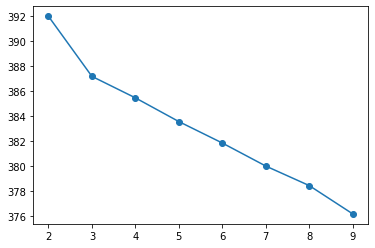

In [238]:
plt.plot(range(2,10),lsti,marker='o')

In [240]:
cl = KMeans(n_clusters=3)

In [241]:
cl.fit(tfvm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [242]:
df['cl'] =cl.predict(tfvm)

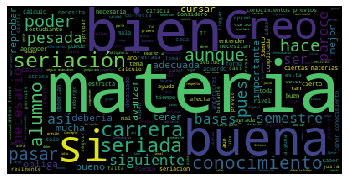

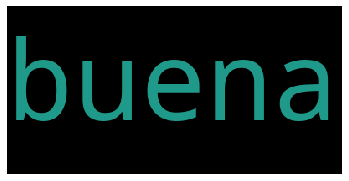

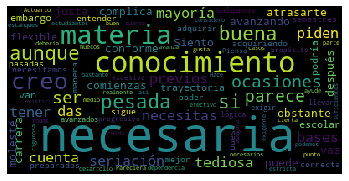

In [244]:
for k in range(3):
    wordcloud = WordCloud(stopwords=stop).generate_from_text(df.loc[df.cl==k]['texto'].to_string(index=False))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()